# Exercises week 36

# Exercise 1

A lot of inspiration was taken from the course notees: 
- https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/week35.html
- https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/week36.html

### Part 1

$$
    \min_{\beta\in\mathbb{R}^p}\frac{1}{n}\Bigl|\Bigl|y-X\beta\Bigr|\Bigr|_2^2 + \lambda\Bigl|\Bigl|\beta\Bigr|\Bigr|_2^2
$$

To find the optimal parameters, we first start by rewriting the expression:
$$
    \frac{1}{n}||y-X\beta||_2^2 + \lambda||\beta||_2^2 = \frac{1}{n}(y-X\beta)^T(y-X\beta)+\lambda\beta^T\beta
$$
We can then take the partial derivative and set it equal to zero to minimize the expression. (and multiply both sides by $n$)
$$
    \begin{split}
        \frac{\partial}{\partial \beta} [(y-X\beta)^T(y-X\beta)+\lambda\beta^T\beta) = 0 \\ 
        \frac{\partial}{\partial \beta} ((y-X\beta)^T(y-X\beta)) + \frac{\partial}{\partial \beta} (\lambda\beta^T\beta) = 0 \\
        -2(y-X\beta)^TX + \lambda(2\beta) = 0
    \end{split}
$$
We then rewrite the expression to get the result in the desired form:
$$
    \begin{split}
        -2(y-X\beta)^TX + \lambda(2\beta) = 0\\
        2(y-X\beta)^TX = \lambda(2\beta)\\
        (2y-2X\beta)^TX = \lambda(2\beta)\\
        X^T(2y-2X\beta) = \lambda(2\beta)\\
        2X^Ty-2X^TX\beta = \lambda(2\beta)\\
        X^Ty-X^TX\beta = \lambda\beta\\
        X^Ty = X^TX\beta + \lambda\beta = \beta(X^TX+\lambda I)\\
        \underline{\underline{\beta = (X^TX+\lambda I)^{-1}X^Ty}}
    \end{split}
$$

---

### Part 2

The function expression for $\tilde{y}$ in OLS (ordinary least squares) is:
$$
    \tilde{y}_{OLS} = X\beta
$$
where:
$$
    \beta = (X^TX)^{-1}X^Ty
$$
Which means $\tilde{y}_{OLS}$ is given by:
$$
    \tilde{y}_{OLS} = X(X^TX)^{-1}X^Ty
$$
The value $X$ is given by:
$$
    X = U\Sigma V^T
$$
This means we can rewrite the expression for $\tilde{y}_{OLS}$ as:
$$
    \begin{split}
        \tilde{y}_{OLS} &= U\Sigma V^T[(U\Sigma V^T)^T(U\Sigma V^T)]^{-1}(U\Sigma V^T)^Ty \\
        \tilde{y}_{OLS} &= U\Sigma V^T[V\Sigma^TU^TU\Sigma V^T]^{-1}V\Sigma^TU^Ty\\
        \tilde{y}_{OLS} &= U\Sigma V^T[V\Sigma^T\Sigma V^T]^{-1}V\Sigma^TU^Ty\\
        \tilde{y}_{OLS} &= U\Sigma V^TV(\Sigma^T)^{-1}\Sigma^{-1} V^TV\Sigma^TU^Ty\\
        \tilde{y}_{OLS} &= U\Sigma (\Sigma^T)^{-1}\Sigma^{-1}\Sigma^TU^Ty\\
        \tilde{y}_{OLS} &= \underline{UU^Ty}
    \end{split}
$$
From here we can rewrite the expression $UU^Ty$ as a sum:
$$
    \underline{\underline{\tilde{y} = \sum_{i=0}^{p-1}u_iu^T_i y}}
$$

---

### Exercise 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

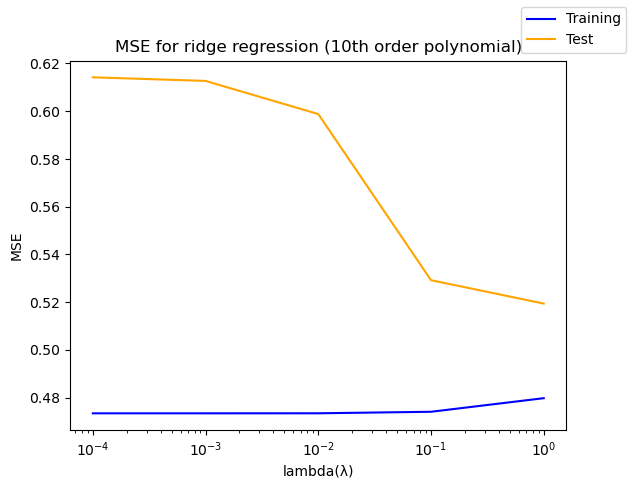

In [5]:
# Static seed for consistency while testing
np.random.seed(1)
n = 50
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

def prep(x, y, degree):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

    X_train = np.fliplr(np.vander(x_train.flatten(), degree+1))
    X_test = np.fliplr(np.vander(x_test.flatten(), degree+1))
    
    X_train = np.delete(X_train, 0, 1)
    X_test = np.delete(X_test, 0, 1)

    scaler = StandardScaler(with_std=False)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

def OLS(X, y, degree):
    beta = np.linalg.inv(X.T@X)@X.T@y
    return X, beta

def RIDGE(X, y, l, degree):
    beta = np.linalg.inv(X.T@X+l*np.identity(len(X[0])))@X.T@y
    return X, beta

def reg(x,y,degree, lambd):
    x_train, x_test, y_train, y_test = prep(x,y,degree)
    mse_ols = []
    r2_ols = []
    mse_ridge = []
    r2_ridge = []

    X_ols, beta_ols = OLS(x_train, y_train, degree)
    y_fit_ols = x_train@beta_ols
    y_pred_ols = x_test@beta_ols
    mse_ols.append((mean_squared_error(y_train, y_fit_ols), mean_squared_error(y_test, y_pred_ols)))
    r2_ols.append((r2_score(y_train, y_fit_ols), r2_score(y_test, y_pred_ols)))

    beta_ridge = []

    for a in lambd:
        X_ridge, beta_ridge = RIDGE(x_train,y_train,a,degree)
    
        y_fit_ridge = x_train@beta_ridge
        y_pred_ridge = x_test@beta_ridge
        
        mse_ridge.append((mean_squared_error(y_train, y_fit_ridge), mean_squared_error(y_test, y_pred_ridge)))
        r2_ridge.append((r2_score(y_train, y_fit_ridge), r2_score(y_test, y_pred_ridge)))
    return (mse_ols, r2_ols, mse_ridge, r2_ridge, beta_ridge)

lambdas = [0.0001, 0.001, 0.01, 0.1, 1]
deg5_mse_ols, deg5_r2_ols, deg5_mse_ridge, deg5_r2_ols, beta_ridge = reg(x,y,5,lambdas)
deg10_mse_ols, deg10_r2_ols, deg10_mse_ridge, deg10_r2_ols, _ = reg(x,y,10,lambdas)
deg15_mse_ols, deg15_r2_ols, deg15_mse_ridge, deg15_r2_ols, _ = reg(x,y,15,lambdas)

# print(deg10_mse)
# print(deg15_mse)

fig, ax = plt.subplots()

y_plot1 = []
y_plot2 = []
for mse in deg10_mse_ridge:
    y_plot1.append(mse[0])
    y_plot2.append(mse[1])
ax.plot(lambdas, y_plot1, "-", color="blue", label="Training")
ax.plot(lambdas, y_plot2, "-", color="orange", label="Test")

ax.set_xlabel("lambda(λ)")
ax.set_ylabel("MSE")

ax.set_xscale("log")

fig.legend()

plt.xticks(lambdas)

plt.title("MSE for ridge regression (10th order polynomial)")

plt.show()
